# Stripe Payout Predictive Analytics and Modeling
## By Rachit Chadha

In [ ]:
#pip install seaborn

In [1]:
#Imports
import pandas as pd
pd.set_option('display.float_format', '{:.2f}'.format)
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
#loading the data
dfp = pd.read_csv('/Users/rachit/Downloads/payouts (1).csv')
dfi = pd.read_csv('/Users/rachit/Downloads/industries - industries.csv.csv')
dfc = pd.read_csv('/Users/rachit/Downloads/countries - countries.csv.csv')

### EDA

In [3]:
#payouts table
dfp

,date,platform_id,recipient_id,count,amount
0,2018-05-16 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,9786.00
1,2018-11-23 00:00:00+00:00,id_424316eb0d974bebd1736fc4bd2eac3d,id_72f05535ba5e6e5b141db6b5c1f1b13b,1,3750.00
2,2018-08-07 00:00:00+00:00,id_3702c1be346117616974e4127c952ab7,id_d70e8046fe5583e1154b2e077133e27c,1,2258.00
3,2018-07-10 00:00:00+00:00,id_a1eafb7ca12772d4e8770b9b3566e608,id_1a336bd21b4bfd9810e0510e1a5f7ec2,1,20369.00
4,2018-01-07 00:00:00+00:00,id_a1eafb7ca12772d4e8770b9b3566e608,id_c577aeddec71607ec0be1f94bef025da,1,34922.00
...,...,...,...,...,...
1622637,2018-08-02 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_e4dff590a6728c8c27a35203f9443c58,1,26284.00
1622638,2018-12-18 00:00:00+00:00,id_4fbd94bb830c62816abb07d6544bd707,id_c37e45a5b586f8fda03482b553885e81,1,8632.00
1622639,2018-04-04 00:00:00+00:00,id_296420e88b94f7b67b7bb305ac82a0e4,id_e027ff25aae5b91268d99907710de5c1,1,33243.00
1622640,2018-07-19 00:00:00+00:00,id_48ba75d17cfea6d24ca5ba8dd72559a0,id_39a6f54346d9c62050ea03fad9693f8f,1,11882.00


In [4]:
#countries table
dfc

,merchant_id,country
0,id_ace715763434d4fd4eda58c9e9d692c6,FR
1,id_717b4a0f74912f18146c0708b330a3d9,US
2,id_671fd54bccd294b502fea89c0cc5a690,US
3,id_d8ed94b4e446b868e38efa8efa34b702,FR
4,id_1a054e523cbf203b16b38fc3e5b19b25,US
...,...,...
112304,id_2175f249ec28ef37248d77248b0f21f8,BE
112305,id_caf14bef6231d0d9dbf86404374b59f7,DE
112306,id_92facd7d913a2b208b632eb0ad0beca5,BE
112307,id_c38b5568c0f7b1f9f5306d9a9b8ee03b,US


In [5]:
#industries table
dfi

,merchant_id,industry
0,id_ace715763434d4fd4eda58c9e9d692c6,Travel & Hospitality
1,id_717b4a0f74912f18146c0708b330a3d9,Food & Beverage
2,id_671fd54bccd294b502fea89c0cc5a690,Professional Services (non-medical)
3,id_d8ed94b4e446b868e38efa8efa34b702,Travel & Hospitality
4,id_1a054e523cbf203b16b38fc3e5b19b25,Professional Services (non-medical)
...,...,...
112304,id_2175f249ec28ef37248d77248b0f21f8,Travel & Hospitality
112305,id_caf14bef6231d0d9dbf86404374b59f7,Travel & Hospitality
112306,id_92facd7d913a2b208b632eb0ad0beca5,Professional Services (non-medical)
112307,id_c38b5568c0f7b1f9f5306d9a9b8ee03b,"Tickets: concerts,sports,movies,conventions"


In [6]:
#join the tables using merchant_id and platform_id
df = pd.merge(dfp, dfi, left_on='platform_id', right_on='merchant_id', how='left')
df = pd.merge(df, dfc, left_on='platform_id', right_on='merchant_id', how='left')
df.drop(['merchant_id_x', 'merchant_id_y'], axis=1, inplace=True)
df.shape, dfp.shape


((1622642, 7), (1622642, 5))

In [7]:
df

,date,platform_id,recipient_id,count,amount,industry,country
0,2018-05-16 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,9786.00,"Tickets: concerts,sports,movies,conventions",US
1,2018-11-23 00:00:00+00:00,id_424316eb0d974bebd1736fc4bd2eac3d,id_72f05535ba5e6e5b141db6b5c1f1b13b,1,3750.00,Travel & Hospitality,NL
2,2018-08-07 00:00:00+00:00,id_3702c1be346117616974e4127c952ab7,id_d70e8046fe5583e1154b2e077133e27c,1,2258.00,Content,DE
3,2018-07-10 00:00:00+00:00,id_a1eafb7ca12772d4e8770b9b3566e608,id_1a336bd21b4bfd9810e0510e1a5f7ec2,1,20369.00,Non-profit,US
4,2018-01-07 00:00:00+00:00,id_a1eafb7ca12772d4e8770b9b3566e608,id_c577aeddec71607ec0be1f94bef025da,1,34922.00,Non-profit,US
...,...,...,...,...,...,...,...
1622637,2018-08-02 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_e4dff590a6728c8c27a35203f9443c58,1,26284.00,"Tickets: concerts,sports,movies,conventions",US
1622638,2018-12-18 00:00:00+00:00,id_4fbd94bb830c62816abb07d6544bd707,id_c37e45a5b586f8fda03482b553885e81,1,8632.00,Other Services,JP
1622639,2018-04-04 00:00:00+00:00,id_296420e88b94f7b67b7bb305ac82a0e4,id_e027ff25aae5b91268d99907710de5c1,1,33243.00,Food & Beverage,US
1622640,2018-07-19 00:00:00+00:00,id_48ba75d17cfea6d24ca5ba8dd72559a0,id_39a6f54346d9c62050ea03fad9693f8f,1,11882.00,Education,US


In [8]:
#converting the date columns to datetime
df['date'] = pd.to_datetime(df['date'])
df

,date,platform_id,recipient_id,count,amount,industry,country
0,2018-05-16 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,9786.00,"Tickets: concerts,sports,movies,conventions",US
1,2018-11-23 00:00:00+00:00,id_424316eb0d974bebd1736fc4bd2eac3d,id_72f05535ba5e6e5b141db6b5c1f1b13b,1,3750.00,Travel & Hospitality,NL
2,2018-08-07 00:00:00+00:00,id_3702c1be346117616974e4127c952ab7,id_d70e8046fe5583e1154b2e077133e27c,1,2258.00,Content,DE
3,2018-07-10 00:00:00+00:00,id_a1eafb7ca12772d4e8770b9b3566e608,id_1a336bd21b4bfd9810e0510e1a5f7ec2,1,20369.00,Non-profit,US
4,2018-01-07 00:00:00+00:00,id_a1eafb7ca12772d4e8770b9b3566e608,id_c577aeddec71607ec0be1f94bef025da,1,34922.00,Non-profit,US
...,...,...,...,...,...,...,...
1622637,2018-08-02 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_e4dff590a6728c8c27a35203f9443c58,1,26284.00,"Tickets: concerts,sports,movies,conventions",US
1622638,2018-12-18 00:00:00+00:00,id_4fbd94bb830c62816abb07d6544bd707,id_c37e45a5b586f8fda03482b553885e81,1,8632.00,Other Services,JP
1622639,2018-04-04 00:00:00+00:00,id_296420e88b94f7b67b7bb305ac82a0e4,id_e027ff25aae5b91268d99907710de5c1,1,33243.00,Food & Beverage,US
1622640,2018-07-19 00:00:00+00:00,id_48ba75d17cfea6d24ca5ba8dd72559a0,id_39a6f54346d9c62050ea03fad9693f8f,1,11882.00,Education,US


In [9]:
df.describe(include='all')

,date,platform_id,recipient_id,count,amount,industry,country
count,1622642,1622642,1622642,1622642.00,1622642.00,1622432,1622437
unique,NaN,463,112030,NaN,NaN,17,25
top,NaN,id_5dded1fc8ff3f8c0d96019076394d2a7,id_e05737fb0f8d7c8b29a5d7a39daf86e3,NaN,NaN,"Tickets: concerts,sports,movies,conventions",US
freq,NaN,531410,246,NaN,NaN,538079,1293529
mean,2018-07-24 19:02:57.013537280+00:00,NaN,NaN,1.09,82887.96,NaN,NaN
min,2018-01-01 00:00:00+00:00,NaN,NaN,1.00,-26139110.00,NaN,NaN
25%,2018-05-08 00:00:00+00:00,NaN,NaN,1.00,7455.00,NaN,NaN
50%,2018-08-02 00:00:00+00:00,NaN,NaN,1.00,22559.00,NaN,NaN
75%,2018-10-17 00:00:00+00:00,NaN,NaN,1.00,68179.00,NaN,NaN
max,2018-12-31 00:00:00+00:00,NaN,NaN,83.00,398161806.00,NaN,NaN


In [10]:
df.query('amount < 0')

,date,platform_id,recipient_id,count,amount,industry,country
581,2018-07-15 00:00:00+00:00,id_84202f58ad6f8b83411d51e8e1062d72,id_c74e457211263d9b8a923858853c7ba6,1,-5424.00,Other Software & Content,US
664,2018-12-21 00:00:00+00:00,id_a1eafb7ca12772d4e8770b9b3566e608,id_7b0cbab050b944b48a8c485478579182,1,-345.00,Non-profit,US
1252,2018-05-09 00:00:00+00:00,id_84202f58ad6f8b83411d51e8e1062d72,id_0c4d1ee4c9ea6068399ffb327f9c80ba,1,-156502.00,Other Software & Content,US
1350,2018-11-22 00:00:00+00:00,id_88a1499bc0a213528ab6d224a1ad208e,id_254368f58342af2fdc79ff7b14bf80e8,2,-50501.00,Education,CA
2163,2018-03-30 00:00:00+00:00,id_a1eafb7ca12772d4e8770b9b3566e608,id_d013666eeace45f37e2a9a833a5004e8,1,-4972.00,Non-profit,US
...,...,...,...,...,...,...,...
1619954,2018-10-17 00:00:00+00:00,id_6c3d0818bcd7b799073908c5ba35eccf,id_fffe8c4caf734841d733338a7ed2a63f,1,-25573.00,Non-profit,US
1620135,2018-07-22 00:00:00+00:00,id_84202f58ad6f8b83411d51e8e1062d72,id_6eaf9130dba89a9b5f7dd37c28c8bac9,1,-27107.00,Other Software & Content,US
1620863,2018-11-08 00:00:00+00:00,id_4a7970ec57a6252a1048a577145baaa4,id_b7e67155aa52e9bf75ee31b433068f51,1,-172260.00,Other Software & Content,US
1620912,2018-11-25 00:00:00+00:00,id_6c3d0818bcd7b799073908c5ba35eccf,id_36c8ae06949b1cbcb9bb57c6afd4f979,1,-13065.00,Non-profit,US


In [11]:
df.isnull().sum()

date              0
platform_id       0
recipient_id      0
count             0
amount            0
industry        210
country         205
dtype: int64

In [12]:
df[df['country'].isnull()].platform_id.nunique()

46

In [13]:
df.query('platform_id == "id_5dc6816942e94eafc3eb816239e067e4"').shape

(54, 7)

In [14]:
df[df['industry'].isnull()].platform_id.nunique()

47

In [15]:
df[df['industry'].isnull()].amount.sum()


1988877.0

In [16]:
df[df['country'].isnull()].amount.sum()

1980939.0

**Null Values**

In [17]:
df_country = df[df['country'].isnull()==False]
df_country.shape, df_country.isnull().sum()

((1622437, 7),
 date            0
 platform_id     0
 recipient_id    0
 count           0
 amount          0
 industry        5
 country         0
 dtype: int64)

In [18]:
df_country

,date,platform_id,recipient_id,count,amount,industry,country
0,2018-05-16 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,9786.00,"Tickets: concerts,sports,movies,conventions",US
1,2018-11-23 00:00:00+00:00,id_424316eb0d974bebd1736fc4bd2eac3d,id_72f05535ba5e6e5b141db6b5c1f1b13b,1,3750.00,Travel & Hospitality,NL
2,2018-08-07 00:00:00+00:00,id_3702c1be346117616974e4127c952ab7,id_d70e8046fe5583e1154b2e077133e27c,1,2258.00,Content,DE
3,2018-07-10 00:00:00+00:00,id_a1eafb7ca12772d4e8770b9b3566e608,id_1a336bd21b4bfd9810e0510e1a5f7ec2,1,20369.00,Non-profit,US
4,2018-01-07 00:00:00+00:00,id_a1eafb7ca12772d4e8770b9b3566e608,id_c577aeddec71607ec0be1f94bef025da,1,34922.00,Non-profit,US
...,...,...,...,...,...,...,...
1622637,2018-08-02 00:00:00+00:00,id_5dded1fc8ff3f8c0d96019076394d2a7,id_e4dff590a6728c8c27a35203f9443c58,1,26284.00,"Tickets: concerts,sports,movies,conventions",US
1622638,2018-12-18 00:00:00+00:00,id_4fbd94bb830c62816abb07d6544bd707,id_c37e45a5b586f8fda03482b553885e81,1,8632.00,Other Services,JP
1622639,2018-04-04 00:00:00+00:00,id_296420e88b94f7b67b7bb305ac82a0e4,id_e027ff25aae5b91268d99907710de5c1,1,33243.00,Food & Beverage,US
1622640,2018-07-19 00:00:00+00:00,id_48ba75d17cfea6d24ca5ba8dd72559a0,id_39a6f54346d9c62050ea03fad9693f8f,1,11882.00,Education,US


In [19]:
#remove timezones from date
df_country['date'] = df_country['date'].dt.tz_localize(None)
df_country

/var/folders/sk/qsx_n73d29l4141kb3n3vyfc0000gn/T/ipykernel_58172/3378868583.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country['date'] = df_country['date'].dt.tz_localize(None)


,date,platform_id,recipient_id,count,amount,industry,country
0,2018-05-16,id_5dded1fc8ff3f8c0d96019076394d2a7,id_23d90ec275370c686dedd7dc1c5e93b3,1,9786.00,"Tickets: concerts,sports,movies,conventions",US
1,2018-11-23,id_424316eb0d974bebd1736fc4bd2eac3d,id_72f05535ba5e6e5b141db6b5c1f1b13b,1,3750.00,Travel & Hospitality,NL
2,2018-08-07,id_3702c1be346117616974e4127c952ab7,id_d70e8046fe5583e1154b2e077133e27c,1,2258.00,Content,DE
3,2018-07-10,id_a1eafb7ca12772d4e8770b9b3566e608,id_1a336bd21b4bfd9810e0510e1a5f7ec2,1,20369.00,Non-profit,US
4,2018-01-07,id_a1eafb7ca12772d4e8770b9b3566e608,id_c577aeddec71607ec0be1f94bef025da,1,34922.00,Non-profit,US
...,...,...,...,...,...,...,...
1622637,2018-08-02,id_5dded1fc8ff3f8c0d96019076394d2a7,id_e4dff590a6728c8c27a35203f9443c58,1,26284.00,"Tickets: concerts,sports,movies,conventions",US
1622638,2018-12-18,id_4fbd94bb830c62816abb07d6544bd707,id_c37e45a5b586f8fda03482b553885e81,1,8632.00,Other Services,JP
1622639,2018-04-04,id_296420e88b94f7b67b7bb305ac82a0e4,id_e027ff25aae5b91268d99907710de5c1,1,33243.00,Food & Beverage,US
1622640,2018-07-19,id_48ba75d17cfea6d24ca5ba8dd72559a0,id_39a6f54346d9c62050ea03fad9693f8f,1,11882.00,Education,US


In [20]:
#group by date and country for amount
df_gpc = df_country.groupby(['date', 'country']).agg({'amount':'sum'}).reset_index()
df_gpc


,date,country,amount
0,2018-01-01,AU,36432.00
1,2018-01-01,BE,180711.00
2,2018-01-01,BR,4976.00
3,2018-01-01,CA,2399512.00
4,2018-01-01,DK,151371.00
...,...,...,...
5953,2018-12-31,NL,559057.00
5954,2018-12-31,NO,17994.00
5955,2018-12-31,NZ,284333.00
5956,2018-12-31,SG,209270.00


In [21]:
df_country.country.value_counts()
# Cant have a proper prediction for PT and MX for example as they have only 1 record and 8 records each ("due to lack of data")

country
US    1293529
FR     131396
HK      50353
JP      32046
DE      24659
BR      22387
CA      21442
NL      11332
BE       9131
GB       5935
IE       4298
AU       4130
ES       2670
DK       2061
SE       1632
NZ       1362
CH       1044
IT        979
AT        970
NO        445
FI        377
LU        153
SG         97
MX          8
PT          1
Name: count, dtype: int64

In [22]:
df_gpc.country.value_counts()

country
US    365
BR    365
FR    365
JP    365
BE    365
GB    364
CA    361
DK    360
SE    360
ES    331
IE    320
AU    299
HK    278
IT    262
NO    254
CH    224
NZ    222
NL    140
DE    117
AT    106
FI     58
SG     52
LU     16
MX      8
PT      1
Name: count, dtype: int64

In [23]:
# amount in PT
df_country.query('country == "PT"').amount.sum()


6403.0

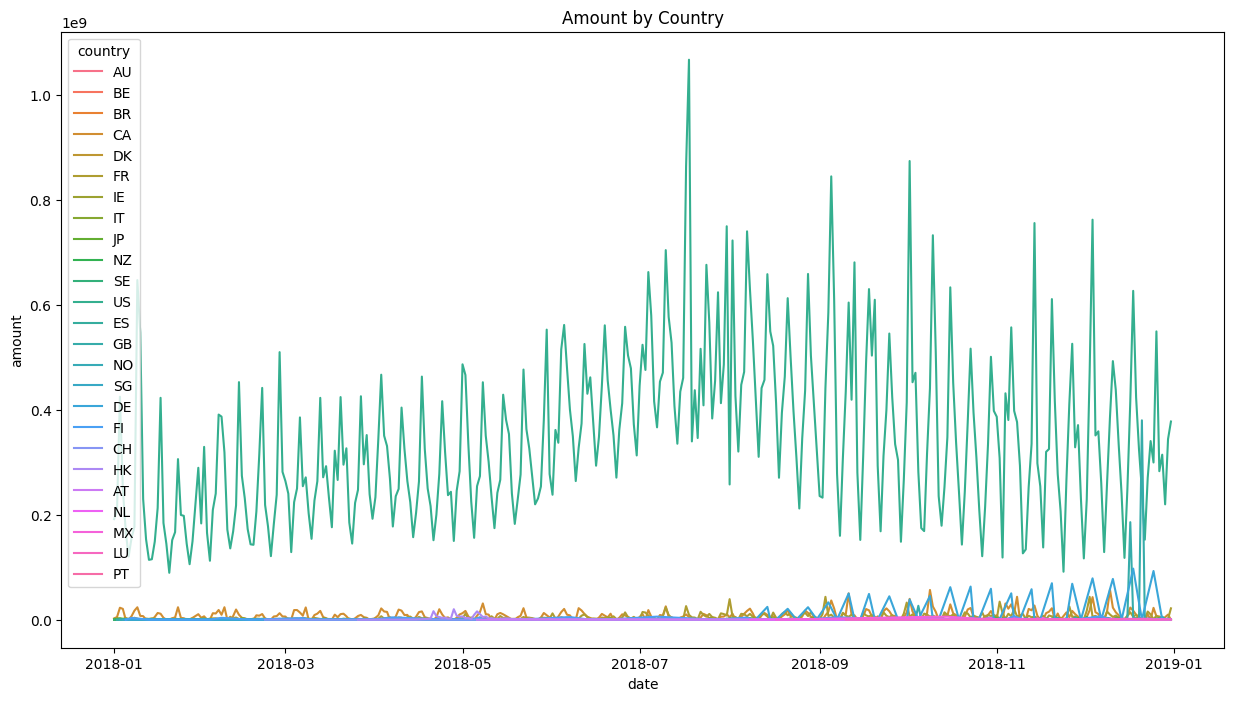

In [24]:
# plotting the amount by country
plt.figure(figsize=(15,8))
sns.lineplot(data=df_gpc, x='date', y='amount', hue='country')
plt.title('Amount by Country')
plt.show()

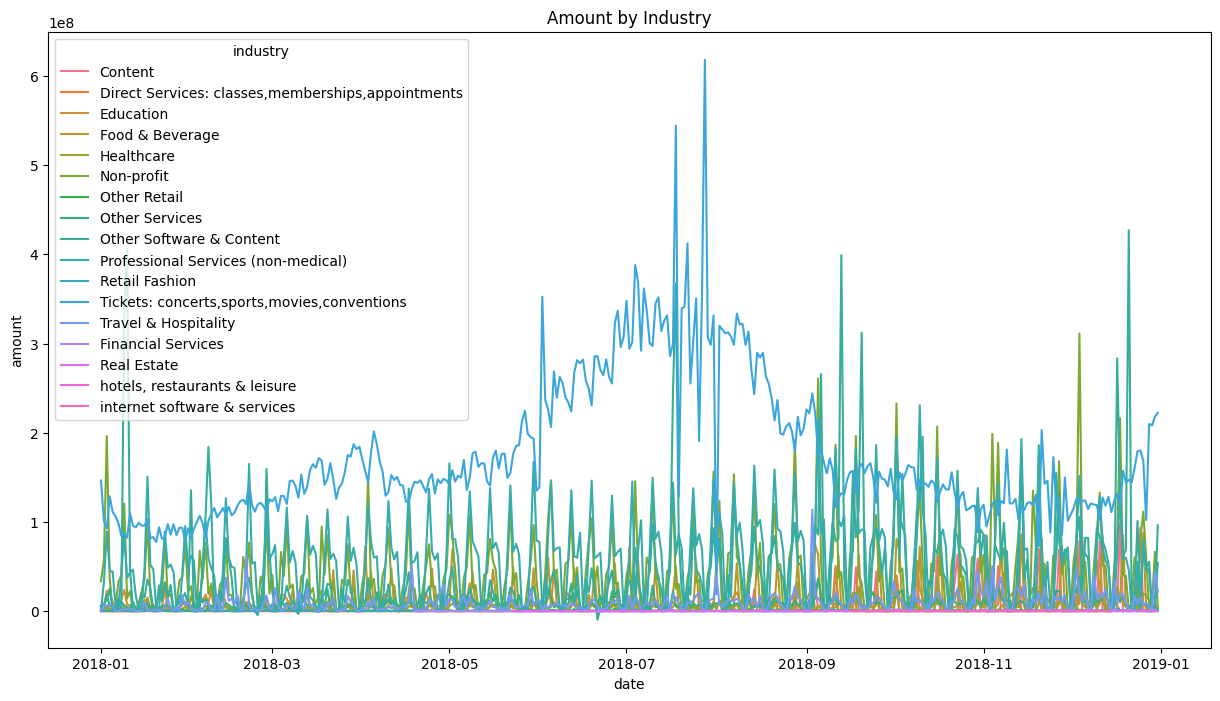

In [51]:
# graph amount grouped by ticket industry by date
df_gpi = df_country.groupby(['date', 'industry']).agg({'amount':'sum'}).reset_index()
plt.figure(figsize=(15,8))
sns.lineplot(data=df_gpi, x='date', y='amount', hue='industry')
plt.title('Amount by Industry')
plt.show()


In [41]:
#Table of amount grouped by industry for USA
df_country.query('country == "US"').groupby('industry').agg({'amount':'sum'}).sort_values('amount', ascending=False)

,amount
industry,
"Tickets: concerts,sports,movies,conventions",63578888488.00
Professional Services (non-medical),21311127886.00
Non-profit,16766277971.00
Other Software & Content,14458233126.00
Food & Beverage,4005988176.00
Travel & Hospitality,2290062765.00
Other Services,1652265009.00
Healthcare,1626470647.00
Retail Fashion,160228509.00


### 1. Prediction amount paid to each country on Jan. 1, 2019 using FB Prophet Time-series Forecast Model

In [25]:
#importing prophet
#%pip install prophet
from prophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [26]:
m = Prophet()
m.fit(df_gpc.query('country == "US"')[['date', 'amount']].rename(columns={'date':'ds', 'amount':'y'}))


12:24:29 - cmdstanpy - INFO - Chain [1] start processing
12:24:29 - cmdstanpy - INFO - Chain [1] done processing


In [27]:
future = m.make_future_dataframe(periods=1)
future.tail()

,ds
361,2018-12-28
362,2018-12-29
363,2018-12-30
364,2018-12-31
365,2019-01-01


In [28]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
361,2018-12-28,232327797.33,121645419.38,343600519.73
362,2018-12-29,153701084.94,46305145.26,263478701.75
363,2018-12-30,235786947.61,129731665.08,349739633.67
364,2018-12-31,302791030.18,190857024.41,402296141.44
365,2019-01-01,474326108.78,367339498.32,594779261.67


In [29]:
dfus = df_gpc.query('country == "US"')[['date', 'amount']].rename(columns={'date':'ds', 'amount':'y'})


In [30]:
dfus.iloc[-4:].y.values

array([3.14390147e+08, 2.19800921e+08, 3.44028387e+08, 3.77583800e+08])

In [31]:
forecast[['yhat']].tail().values - dfus.iloc[-4:].y.values

array([[-8.20623497e+07,  1.25268763e+07, -1.11700590e+08,
        -1.45256003e+08],
       [-1.60689062e+08, -6.60998361e+07, -1.90327302e+08,
        -2.23882715e+08],
       [-7.86031994e+07,  1.59860266e+07, -1.08241439e+08,
        -1.41796852e+08],
       [-1.15991168e+07,  8.29901092e+07, -4.12373568e+07,
        -7.47927698e+07],
       [ 1.59935962e+08,  2.54525188e+08,  1.30297722e+08,
         9.67423088e+07]])

In [32]:
((np.mean((forecast[['yhat']].tail().values.flatten()[:4]- dfus.iloc[-4:].y.values)**2))**0.5)/100

842816.4862435062

In [33]:
842816.4862435062/dfus.y.mean()

0.002442018017455325

/Users/rachit/miniforge3/lib/python3.10/site-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/Users/rachit/miniforge3/lib/python3.10/site-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


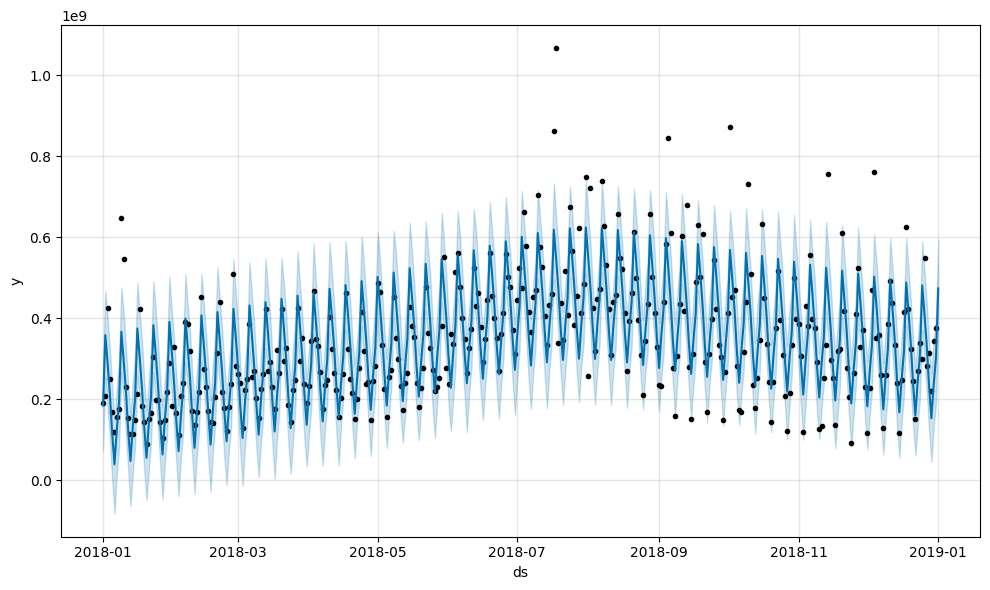

In [35]:
# plot
fig1 = m.plot(forecast)

/Users/rachit/miniforge3/lib/python3.10/site-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


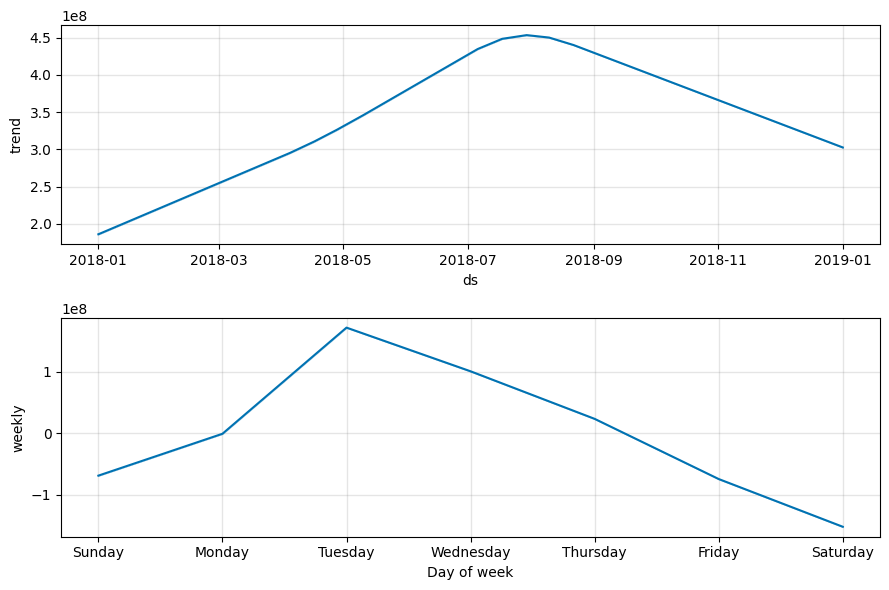

In [36]:
fig2 = m.plot_components(forecast)

**For Country "FI"**
A country to test prediction with lower number of dates (occurances) in the data

In [47]:
m = Prophet()
m.fit(df_gpc.query('country == "FI"')[['date', 'amount']].rename(columns={'date':'ds', 'amount':'y'}))
future = m.make_future_dataframe(periods=4)
#future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

11:50:48 - cmdstanpy - INFO - Chain [1] start processing


11:50:48 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
57,2018-12-28,1228318.40,-1128204.32,3588248.83
58,2018-12-29,846263.33,-1630225.23,3309506.67
59,2018-12-30,816538.81,-1663947.74,3281723.98
60,2018-12-31,715233.03,-1754945.05,3130839.62
61,2019-01-01,1465775.72,-1044825.96,3855646.35


In [48]:
df_gpc

,date,country,amount
0,2018-01-01,AU,36432.00
1,2018-01-01,BE,180711.00
2,2018-01-01,BR,4976.00
3,2018-01-01,CA,2399512.00
4,2018-01-01,DK,151371.00
...,...,...,...
5953,2018-12-31,NL,559057.00
5954,2018-12-31,NO,17994.00
5955,2018-12-31,NZ,284333.00
5956,2018-12-31,SG,209270.00


**Custom cell block to loop through each country and fit prophet model**

In [49]:
import datetime
# loop through each country
# if the latest date is not December 31, 2018, changing the period accordingly so that the latest predicted amount is for Jan 1, 2019. else put 1
# usual prediction through prophet and calculate the error
# loop through each country


df_forecast = pd.DataFrame(columns=['country', 'yhat', 'yhat_lower', 'yhat_upper', 'error', 'median', 'error_perc_median'])

for country in df_gpc['country'].unique():
    if country in ['PT']:
        continue
    _df = df_gpc.query(f'country == "{country}"')[['date', 'amount']].rename(columns={'date':'ds', 'amount':'y'})
    country_latest_date = _df['ds'].max()
    second_latest_date = _df['ds'].sort_values(ascending=False).unique()[1]
    # check if the latest date is not December 31, 2018
    adjusted_period = (datetime.datetime(2019, 1, 1) - country_latest_date).days
    #print(f'Country: {country}, {country_latest_date}, Adjusted Period: {adjusted_period}')
    # usual prediction through prophet
    m = Prophet()

    m.fit(_df)
    future = m.make_future_dataframe(periods=adjusted_period)
    forecast = m.predict(future)
    latest_date_prediction = forecast.loc[forecast['ds'] == country_latest_date, 'yhat'].values[0]
    second_latest_date_prediction = forecast.loc[forecast['ds'] == second_latest_date, 'yhat'].values[0]
    true_value_latest_date = _df.query('ds == @country_latest_date')['y'].values[0]
    true_value_second_latest_date = _df.query('ds == @second_latest_date')['y'].values[0]
    error = abs(latest_date_prediction - true_value_latest_date)
    #error = (abs(latest_date_prediction - true_value_latest_date) + abs(second_latest_date_prediction - true_value_second_latest_date)) / 2

    df_forecast.loc[len(df_forecast)] = [country,
                                         forecast['yhat'].tail(1).values[0],
                                         forecast['yhat_lower'].tail(1).values[0],
                                         forecast['yhat_upper'].tail(1).values[0],
                                         error,
                                         _df.y.median(),
                                        error * 100/true_value_latest_date]
                                         
                                        



11:51:09 - cmdstanpy - INFO - Chain [1] start processing


11:51:09 - cmdstanpy - INFO - Chain [1] done processing
11:51:09 - cmdstanpy - INFO - Chain [1] start processing
11:51:09 - cmdstanpy - INFO - Chain [1] done processing
11:51:09 - cmdstanpy - INFO - Chain [1] start processing
11:51:09 - cmdstanpy - INFO - Chain [1] done processing
11:51:09 - cmdstanpy - INFO - Chain [1] start processing
11:51:09 - cmdstanpy - INFO - Chain [1] done processing
11:51:10 - cmdstanpy - INFO - Chain [1] start processing
11:51:10 - cmdstanpy - INFO - Chain [1] done processing
11:51:10 - cmdstanpy - INFO - Chain [1] start processing
11:51:10 - cmdstanpy - INFO - Chain [1] done processing
11:51:10 - cmdstanpy - INFO - Chain [1] start processing
11:51:10 - cmdstanpy - INFO - Chain [1] done processing
11:51:10 - cmdstanpy - INFO - Chain [1] start processing
11:51:10 - cmdstanpy - INFO - Chain [1] done processing
11:51:10 - cmdstanpy - INFO - Chain [1] start processing
11:51:10 - cmdstanpy - INFO - Chain [1] done processing
11:51:10 - cmdstanpy - INFO - Chain [1] 

In [50]:
df_forecast['date'] = datetime.datetime(2019, 1, 1)

**Analyzing results and noting the error per median**

In [51]:
df_forecast

,country,yhat,yhat_lower,yhat_upper,error,median,error_perc_median,date
0,AU,757407.39,116224.35,1338617.68,417819.75,320731.00,5214.92,2019-01-01
1,BE,285342.91,130359.57,422763.12,65257.75,232649.00,20.78,2019-01-01
2,BR,526464.21,370318.95,677195.68,130409.05,227861.00,40.07,2019-01-01
3,CA,21272374.22,12404798.21,29751471.52,15611241.71,6177868.00,194775.32,2019-01-01
4,DK,597785.03,147026.90,1095854.67,18685.87,122546.50,3.28,2019-01-01
5,FR,8556680.78,1631578.32,15204379.35,9676106.14,3243185.00,44.64,2019-01-01
6,IE,1148320.72,631891.62,1617869.44,68929.71,311474.50,7.68,2019-01-01
7,IT,31942.42,-321526.02,363015.65,42352.89,82650.50,28.77,2019-01-01
8,JP,1596101.14,1077368.41,2132356.80,326731.64,828184.00,33.10,2019-01-01
9,NZ,613185.73,37377.13,1218205.57,178372.28,158494.50,62.73,2019-01-01


**Country PT was excluded since it has only 1 entry and therefore model will not output desired prediction**

### 2. Predicting total payout volume on a typical day in 3 industries

In [52]:
df.industry.value_counts()

industry
Tickets: concerts,sports,movies,conventions          538079
Non-profit                                           255601
Professional Services (non-medical)                  218930
Food & Beverage                                      145922
Other Services                                       142841
Travel & Hospitality                                 116688
Other Software & Content                             107632
Healthcare                                            32718
Content                                               25128
Education                                             23597
Retail Fashion                                         7811
Direct Services: classes,memberships,appointments      5429
Other Retail                                           1810
Financial Services                                      167
Real Estate                                              58
internet software & services                             20
hotels, restaurants & leisure  

In [58]:
#industry list
ind_list = ['Education', 'hotels, restaurants & leisure', 'Food & Beverage']
dfsample = df.query('industry in @ind_list').groupby(['date', 'industry', 'platform_id']).agg({'amount':'sum'}).reset_index()
df_ind = dfsample.groupby(['date', 'industry']).agg({'amount':'median'}).reset_index()

In [59]:
df_ind.industry.value_counts()

industry
Food & Beverage                  365
Education                        360
hotels, restaurants & leisure      1
Name: count, dtype: int64

In [60]:
#remove timezones from date
df_ind['date'] = df_ind['date'].dt.tz_localize(None)

**Forecasting Food & Beverage and Education Industry as there is only 1 hotels, restaurants & leisure entry**

In [61]:
m = Prophet()
m.fit(df_ind.query('industry == "Food & Beverage"')[['date', 'amount']].rename(columns={'date':'ds', 'amount':'y'}))
future = m.make_future_dataframe(periods=365)
#future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365)
40*forecast[['yhat']].tail(365).median() ## 40 is the number of platforms in the industry that is multiplied by the median of the forecasted amount

11:56:00 - cmdstanpy - INFO - Chain [1] start processing
11:56:00 - cmdstanpy - INFO - Chain [1] done processing


yhat   25210221.60
dtype: float64

In [62]:
m = Prophet()
m.fit(df_ind.query('industry == "Education"')[['date', 'amount']].rename(columns={'date':'ds', 'amount':'y'}))
future = m.make_future_dataframe(periods=365)
#future.tail()
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(365)
15*forecast[['yhat','yhat_lower', 'yhat_upper']].tail(365).median() ## 15 is the number of platforms in the industry that is multiplied by the median of the forecasted amount

11:56:05 - cmdstanpy - INFO - Chain [1] start processing


11:56:05 - cmdstanpy - INFO - Chain [1] done processing


yhat          56495871.34
yhat_lower   -17807494.93
yhat_upper   130545451.14
dtype: float64

In [63]:
df_ind[df_ind.industry=='hotels, restaurants & leisure'].amount*5

427   470.00
Name: amount, dtype: float64

**The predicted amounts are multiplied by given numbers of each industry to get a forecast for "any typical day" in 2019. Moreover, we are using median and tail(365) in this case.**

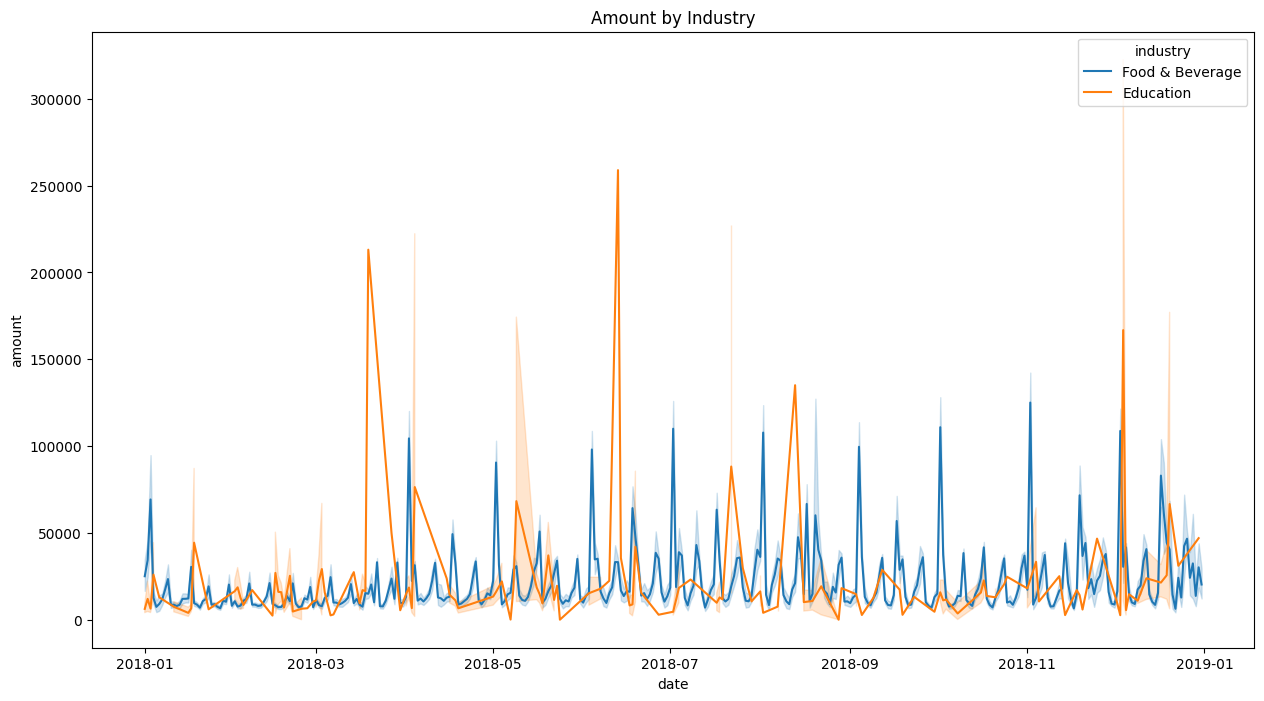

In [65]:
# Filter the data for Education, Hotels, Restaurants & Leisure, and Food & Beverage industries
filtered_industries = ['Education', 'Food & Beverage']
df_filtered = df_country[(df_country['industry'].isin(filtered_industries)) & (df_country['country'] == 'US')]

# Plot the amount by industry
plt.figure(figsize=(15,8))
sns.lineplot(data=df_filtered, x='date', y='amount', hue='industry')
plt.title('Amount by Industry')
plt.show()

In [63]:
df_coi

,amount
industry,
"Tickets: concerts,sports,movies,conventions",63578888488.00
Professional Services (non-medical),21311127886.00
Non-profit,16766277971.00
Other Software & Content,14458233126.00
Food & Beverage,4005988176.00
Travel & Hospitality,2290062765.00
Other Services,1652265009.00
Healthcare,1626470647.00
Retail Fashion,160228509.00
